# fociPicker3d - plugin on imagej
worked on Hedy; results in 20210110 folder

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
import matplotlib.pyplot as plt
from skimage.external import tifffile
import seaborn as sns
from skimage.external.tifffile import imread
import os
from os import listdir
from os.path import isfile, join

In [2]:
bigDir=r'Z:\CookLab\Liu\DNAdamageAnalysis\20210110'

In [3]:
imageFolder=f'{bigDir}\\data_tiff'

In [4]:
dataFile=f'{bigDir}\\cellinfo_20210110_v7.csv'
data=pd.read_csv(dataFile)

In [5]:
data.head()

,Unnamed: 0,Unnamed: 0.1,file,original cell name,movie,ID,x,y,molecular_age,category,...,nuc_DAPI_total,inner_DAPI_total,outer_DAPI_total,nuc_DAPI_het,inner_DAPI_het,outer_DAPI_het,nuc_DAPI_eu,inner_DAPI_eu,outer_DAPI_eu,day
0,0,0,20210110_cell_00.ciz,20210110xy01_S1.czi,20210110xy01,NaN,NaN,NaN,NaN,LateS,...,6817731168,2354269459,4463461709,2330318547,1321232918,1009085629,4487412621,1033036541,3454376080,d20210110
1,1,1,20210110_cell_02.ciz,20210110xy01_S3.czi,20210110xy01,NaN,NaN,NaN,NaN,LateS,...,6516142543,2162395235,4353747308,2248349916,1239642048,1008707868,4267792627,922753187,3345039440,d20210110
2,2,2,20210110_cell_03.ciz,20210110xy01_S4.czi,20210110xy01,NaN,NaN,NaN,NaN,LateS,...,6386977448,2441791517,3945185931,2222657732,1285322397,937335335,4164319716,1156469120,3007850596,d20210110
3,3,3,20210110_cell_04.ciz,20210110xy01_S5.czi,20210110xy01,NaN,NaN,NaN,NaN,LateS,...,6825566649,2248947872,4576618777,2257515934,1292296373,965219561,4568050715,956651499,3611399216,d20210110
4,4,4,20210110_cell_05.ciz,20210110xy01_S6.czi,20210110xy01,NaN,NaN,NaN,NaN,LateS,...,6486096125,2365441587,4120654538,2302812319,1516125809,786686510,4183283806,849315778,3333968028,d20210110


In [6]:
CTL=data.loc[data.group=='CTL',:]

APH=data.loc[data.group=='APH',:]

APHDOX=data.loc[data.group=='APH+DOX',:]

DOX=data.loc[data.group=='DOX',:]

## `foci-results5` (setting #5) (seems most suitable)

changes from default are bolded

**Backgroud Type=balanced <br/>
UniformBackground = 10000.0 <br/>**
Auto-Background radius= 6 <br/>
MinISetting = 0.5(RelativetoMaximum) <br/>
ToleranceSetting = 45.0 <br/>
**Minimum Volume (Pixel number) = 25 <br/>**
Calibration of image: pixels per um <br/>
 VoxelX= 1.0 VoxelY= 1.0 VoxelZ = 1.0 <br/>
**ContrastBanlance = 0.25 <br/>**
Exclude spontaneous foci? --No <br/>
Foci Shape Validation: No <br/>
computing threads: n=1 <br/>

In [64]:
for i,row in data.iterrows():
    resultPath=data.loc[i,'path'].replace('data_tiff','foci-results5')
    resultPath=resultPath.replace('20210110_cell_','Results-')
    resultPath=resultPath.replace('.tif','.csv')
    try:
        resultsDF=pd.read_csv(resultPath)
        data.loc[i,'fociNo']=len(resultsDF.index)
    except:
        data.loc[i,'fociNo']=0
    

In [65]:
data.to_csv(dataFile.replace('7','12'))

### setting #5 visualizations

In [66]:
data=pd.read_csv(dataFile.replace('7','12'))

In [67]:
data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,file,...,outer_DAPI_total,nuc_DAPI_het,inner_DAPI_het,outer_DAPI_het,nuc_DAPI_eu,inner_DAPI_eu,outer_DAPI_eu,day,fociNo,resultPath
0,0,0,0,0,0,0,0,0,0,20210110_cell_00.ciz,...,4463461709,2330318547,1321232918,1009085629,4487412621,1033036541,3454376080,d20210110,6.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...
1,1,1,1,1,1,1,1,1,1,20210110_cell_02.ciz,...,4353747308,2248349916,1239642048,1008707868,4267792627,922753187,3345039440,d20210110,16.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...
2,2,2,2,2,2,2,2,2,2,20210110_cell_03.ciz,...,3945185931,2222657732,1285322397,937335335,4164319716,1156469120,3007850596,d20210110,8.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...
3,3,3,3,3,3,3,3,3,3,20210110_cell_04.ciz,...,4576618777,2257515934,1292296373,965219561,4568050715,956651499,3611399216,d20210110,3.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...
4,4,4,4,4,4,4,4,4,4,20210110_cell_05.ciz,...,4120654538,2302812319,1516125809,786686510,4183283806,849315778,3333968028,d20210110,14.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...


<IPython.core.display.Javascript object>


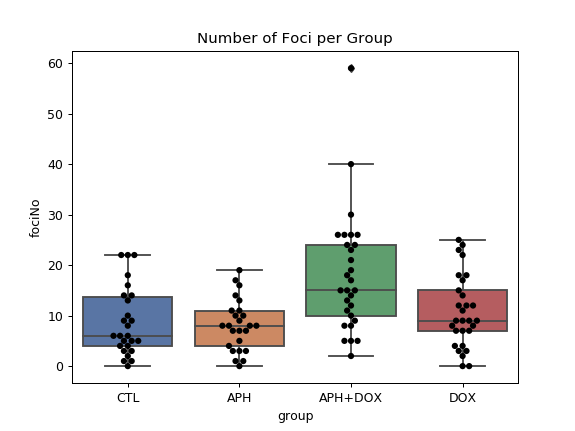

In [68]:
%matplotlib notebook
ax=sns.boxplot(data=data,x='group',y='fociNo', palette="deep")
ax.set(xlabel="Groups", ylabel="Number of Foci")
ax.set_title("Number of Foci per Group")
sns.swarmplot(data=data,x='group',y='fociNo', color='black')

<IPython.core.display.Javascript object>


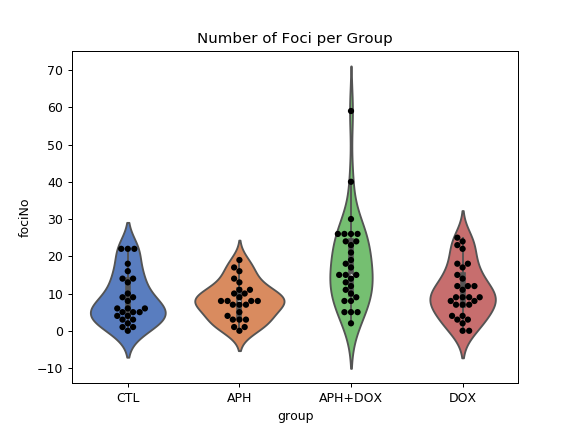

In [69]:
%matplotlib notebook
ax=sns.violinplot(data=data,x='group',y='fociNo', palette="muted")
ax.set(xlabel="Groups", ylabel="Number of Foci")
ax.set_title("Number of Foci per Group")
sns.swarmplot(data=data,x='group',y='fociNo', color='black')

## `foci-results` (setting #1)

changes from default are bolded

**Backgroud Type=balanced <br/>
UniformBackground = 7500.0 <br/>**
Auto-Background radius= 6 <br/>
MinISetting = 0.5(RelativetoMaximum) <br/>
ToleranceSetting = 45.0 <br/>
**Minimum Volume (Pixel number) = 20 <br/>**
Calibration of image: pixels per um <br/>
 VoxelX= 1.0 VoxelY= 1.0 VoxelZ = 1.0 <br/>
**ContrastBanlance = 0.25 <br/>**
Exclude spontaneous foci? --No <br/>
Foci Shape Validation: No <br/>
computing threads: n=1 <br/>

In [34]:
for i,row in data.iterrows():
    resultPath=data.loc[i,'path'].replace('data_tiff','foci-results')
    resultPath=resultPath.replace('20210110_cell_','Results-')
    resultPath=resultPath.replace('.tif','.csv')
    resultsDF=pd.read_csv(resultPath)
    data.loc[i,'fociNo']=len(resultsDF.index)

In [15]:
data.to_csv(dataFile.replace('7','8'))

### setting #1 visualizations

In [16]:
data=pd.read_csv(dataFile.replace('7','8'))

In [17]:
data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,file,original cell name,movie,ID,x,y,...,inner_DAPI_total,outer_DAPI_total,nuc_DAPI_het,inner_DAPI_het,outer_DAPI_het,nuc_DAPI_eu,inner_DAPI_eu,outer_DAPI_eu,day,fociNo
0,0,0,0,0,20210110_cell_00.ciz,20210110xy01_S1.czi,20210110xy01,NaN,NaN,NaN,...,2354269459,4463461709,2330318547,1321232918,1009085629,4487412621,1033036541,3454376080,d20210110,41.0
1,1,1,1,1,20210110_cell_02.ciz,20210110xy01_S3.czi,20210110xy01,NaN,NaN,NaN,...,2162395235,4353747308,2248349916,1239642048,1008707868,4267792627,922753187,3345039440,d20210110,37.0
2,2,2,2,2,20210110_cell_03.ciz,20210110xy01_S4.czi,20210110xy01,NaN,NaN,NaN,...,2441791517,3945185931,2222657732,1285322397,937335335,4164319716,1156469120,3007850596,d20210110,51.0
3,3,3,3,3,20210110_cell_04.ciz,20210110xy01_S5.czi,20210110xy01,NaN,NaN,NaN,...,2248947872,4576618777,2257515934,1292296373,965219561,4568050715,956651499,3611399216,d20210110,18.0
4,4,4,4,4,20210110_cell_05.ciz,20210110xy01_S6.czi,20210110xy01,NaN,NaN,NaN,...,2365441587,4120654538,2302812319,1516125809,786686510,4183283806,849315778,3333968028,d20210110,72.0


<IPython.core.display.Javascript object>


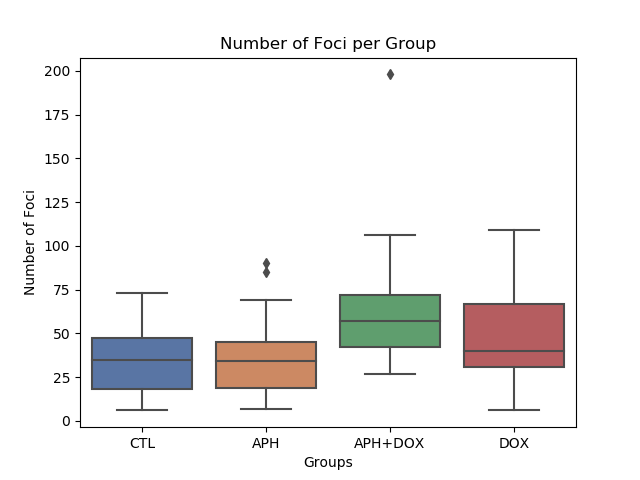

Text(0.5, 1.0, 'Number of Foci per Group')

In [18]:
%matplotlib notebook
ax=sns.boxplot(data=data,x='group',y='fociNo', palette="deep")
ax.set(xlabel="Groups", ylabel="Number of Foci")
ax.set_title("Number of Foci per Group")
#sns.swarmplot(data=data,x='group',y='fociNo', color='black')

<IPython.core.display.Javascript object>


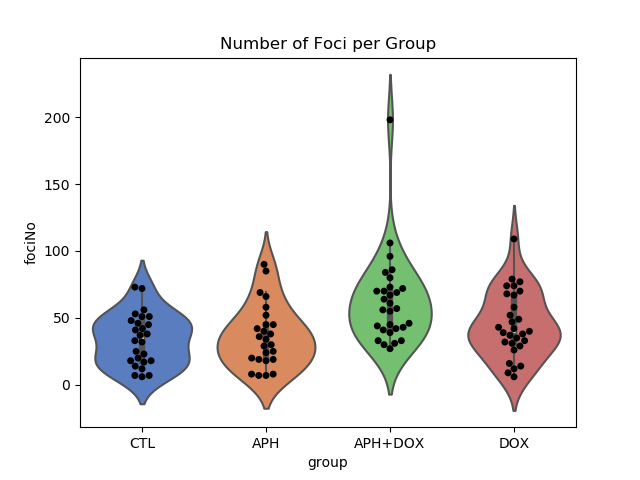

In [23]:
%matplotlib notebook
ax=sns.violinplot(data=data,x='group',y='fociNo', palette="muted")
ax.set(xlabel="Groups", ylabel="Number of Foci")
ax.set_title("Number of Foci per Group")
sns.swarmplot(data=data,x='group',y='fociNo', color='black')

## `foci-results2` (setting #2)

changes from default are bolded

**Backgroud Type=balanced <br/>
UniformBackground = 10000.0 <br/>**
Auto-Background radius= 6 <br/>
MinISetting = 0.5(RelativetoMaximum) <br/>
ToleranceSetting = 45.0 <br/>
**Minimum Volume (Pixel number) = 20 <br/>**
Calibration of image: pixels per um <br/>
 VoxelX= 1.0 VoxelY= 1.0 VoxelZ = 1.0 <br/>
**ContrastBanlance = 0.25 <br/>**
Exclude spontaneous foci? --No <br/>
Foci Shape Validation: No <br/>
computing threads: n=1 <br/>

In [40]:
for i,row in data.iterrows():
    resultPath=data.loc[i,'path'].replace('data_tiff','foci-results2')
    resultPath=resultPath.replace('20210110_cell_','Results-')
    resultPath=resultPath.replace('.tif','.csv')
    try:
        resultsDF=pd.read_csv(resultPath)
        data.loc[i,'fociNo']=len(resultsDF.index)
    except:
        data.loc[i,'fociNo']=0
    

In [41]:
data.to_csv(dataFile.replace('7','9'))

### setting #2 visualizations

In [42]:
data=pd.read_csv(dataFile.replace('7','9'))

In [43]:
data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,file,original cell name,movie,ID,x,...,outer_DAPI_total,nuc_DAPI_het,inner_DAPI_het,outer_DAPI_het,nuc_DAPI_eu,inner_DAPI_eu,outer_DAPI_eu,day,fociNo,resultPath
0,0,0,0,0,0,20210110_cell_00.ciz,20210110xy01_S1.czi,20210110xy01,NaN,NaN,...,4463461709,2330318547,1321232918,1009085629,4487412621,1033036541,3454376080,d20210110,11.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...
1,1,1,1,1,1,20210110_cell_02.ciz,20210110xy01_S3.czi,20210110xy01,NaN,NaN,...,4353747308,2248349916,1239642048,1008707868,4267792627,922753187,3345039440,d20210110,22.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...
2,2,2,2,2,2,20210110_cell_03.ciz,20210110xy01_S4.czi,20210110xy01,NaN,NaN,...,3945185931,2222657732,1285322397,937335335,4164319716,1156469120,3007850596,d20210110,16.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...
3,3,3,3,3,3,20210110_cell_04.ciz,20210110xy01_S5.czi,20210110xy01,NaN,NaN,...,4576618777,2257515934,1292296373,965219561,4568050715,956651499,3611399216,d20210110,7.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...
4,4,4,4,4,4,20210110_cell_05.ciz,20210110xy01_S6.czi,20210110xy01,NaN,NaN,...,4120654538,2302812319,1516125809,786686510,4183283806,849315778,3333968028,d20210110,24.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...


<IPython.core.display.Javascript object>


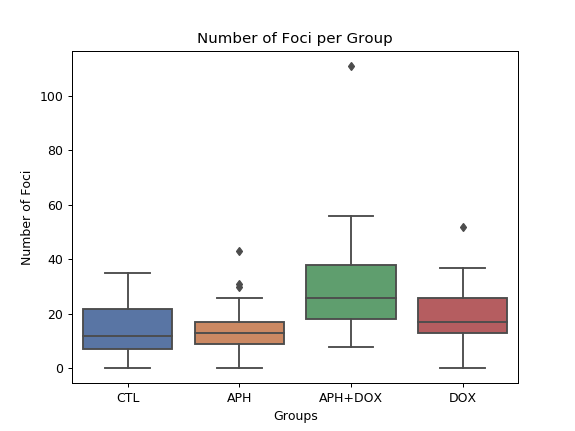

Text(0.5, 1.0, 'Number of Foci per Group')

In [44]:
%matplotlib notebook
ax=sns.boxplot(data=data,x='group',y='fociNo', palette="deep")
ax.set(xlabel="Groups", ylabel="Number of Foci")
ax.set_title("Number of Foci per Group")
#sns.swarmplot(data=data,x='group',y='fociNo', color='black')

<IPython.core.display.Javascript object>


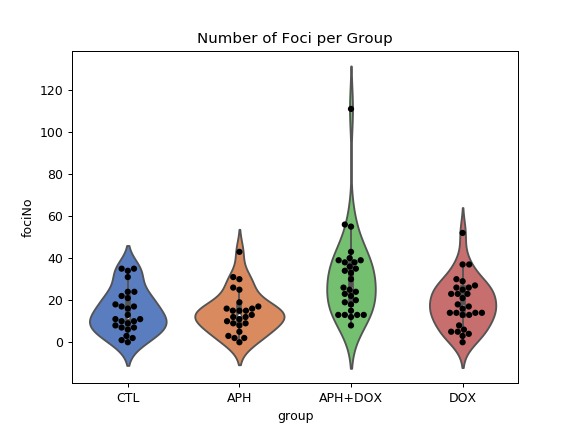

In [45]:
%matplotlib notebook
ax=sns.violinplot(data=data,x='group',y='fociNo', palette="muted")
ax.set(xlabel="Groups", ylabel="Number of Foci")
ax.set_title("Number of Foci per Group")
sns.swarmplot(data=data,x='group',y='fociNo', color='black')

## `foci-results3` (setting #3)

changes from default are bolded

**Backgroud Type=balanced <br/>
UniformBackground = 7500.0 <br/>**
Auto-Background radius= 6 <br/>
MinISetting = 0.5(RelativetoMaximum) <br/>
ToleranceSetting = 45.0 <br/>
**Minimum Volume (Pixel number) = 25 <br/>**
Calibration of image: pixels per um <br/>
 VoxelX= 1.0 VoxelY= 1.0 VoxelZ = 1.0 <br/>
**ContrastBanlance = 0.25 <br/>**
Exclude spontaneous foci? --No <br/>
Foci Shape Validation: No <br/>
computing threads: n=1 <br/>

In [46]:
for i,row in data.iterrows():
    resultPath=data.loc[i,'path'].replace('data_tiff','foci-results3')
    resultPath=resultPath.replace('20210110_cell_','Results-')
    resultPath=resultPath.replace('.tif','.csv')
    try:
        resultsDF=pd.read_csv(resultPath)
        data.loc[i,'fociNo']=len(resultsDF.index)
    except:
        data.loc[i,'fociNo']=0
    

In [47]:
data.to_csv(dataFile.replace('7','10'))

### setting #2 visualizations

In [48]:
data=pd.read_csv(dataFile.replace('7','10'))

In [49]:
data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,file,original cell name,movie,ID,...,outer_DAPI_total,nuc_DAPI_het,inner_DAPI_het,outer_DAPI_het,nuc_DAPI_eu,inner_DAPI_eu,outer_DAPI_eu,day,fociNo,resultPath
0,0,0,0,0,0,0,20210110_cell_00.ciz,20210110xy01_S1.czi,20210110xy01,NaN,...,4463461709,2330318547,1321232918,1009085629,4487412621,1033036541,3454376080,d20210110,15.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...
1,1,1,1,1,1,1,20210110_cell_02.ciz,20210110xy01_S3.czi,20210110xy01,NaN,...,4353747308,2248349916,1239642048,1008707868,4267792627,922753187,3345039440,d20210110,25.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...
2,2,2,2,2,2,2,20210110_cell_03.ciz,20210110xy01_S4.czi,20210110xy01,NaN,...,3945185931,2222657732,1285322397,937335335,4164319716,1156469120,3007850596,d20210110,23.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...
3,3,3,3,3,3,3,20210110_cell_04.ciz,20210110xy01_S5.czi,20210110xy01,NaN,...,4576618777,2257515934,1292296373,965219561,4568050715,956651499,3611399216,d20210110,9.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...
4,4,4,4,4,4,4,20210110_cell_05.ciz,20210110xy01_S6.czi,20210110xy01,NaN,...,4120654538,2302812319,1516125809,786686510,4183283806,849315778,3333968028,d20210110,34.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...


<IPython.core.display.Javascript object>


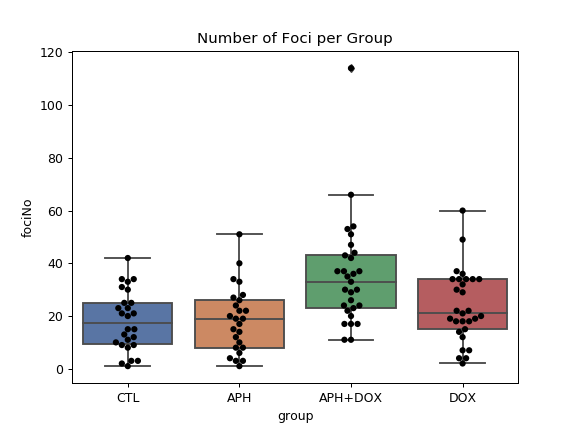

In [51]:
%matplotlib notebook
ax=sns.boxplot(data=data,x='group',y='fociNo', palette="deep")
ax.set(xlabel="Groups", ylabel="Number of Foci")
ax.set_title("Number of Foci per Group")
sns.swarmplot(data=data,x='group',y='fociNo', color='black')

<IPython.core.display.Javascript object>


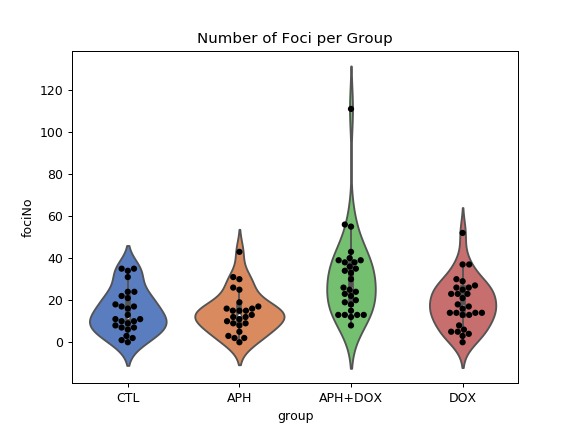

In [45]:
%matplotlib notebook
ax=sns.violinplot(data=data,x='group',y='fociNo', palette="muted")
ax.set(xlabel="Groups", ylabel="Number of Foci")
ax.set_title("Number of Foci per Group")
sns.swarmplot(data=data,x='group',y='fociNo', color='black')

## `foci-results4` (setting #4)

changes from default are bolded

**Backgroud Type=balanced <br/>
UniformBackground = 8500.0 <br/>**
Auto-Background radius= 6 <br/>
MinISetting = 0.5(RelativetoMaximum) <br/>
ToleranceSetting = 45.0 <br/>
**Minimum Volume (Pixel number) = 25 <br/>**
Calibration of image: pixels per um <br/>
 VoxelX= 1.0 VoxelY= 1.0 VoxelZ = 1.0 <br/>
**ContrastBanlance = 0.25 <br/>**
Exclude spontaneous foci? --No <br/>
Foci Shape Validation: No <br/>
computing threads: n=1 <br/>

In [52]:
for i,row in data.iterrows():
    resultPath=data.loc[i,'path'].replace('data_tiff','foci-results4')
    resultPath=resultPath.replace('20210110_cell_','Results-')
    resultPath=resultPath.replace('.tif','.csv')
    try:
        resultsDF=pd.read_csv(resultPath)
        data.loc[i,'fociNo']=len(resultsDF.index)
    except:
        data.loc[i,'fociNo']=0
    

In [53]:
data.to_csv(dataFile.replace('7','11'))

### setting #4 visualizations

In [54]:
data=pd.read_csv(dataFile.replace('7','11'))

In [55]:
data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,file,original cell name,movie,...,outer_DAPI_total,nuc_DAPI_het,inner_DAPI_het,outer_DAPI_het,nuc_DAPI_eu,inner_DAPI_eu,outer_DAPI_eu,day,fociNo,resultPath
0,0,0,0,0,0,0,0,20210110_cell_00.ciz,20210110xy01_S1.czi,20210110xy01,...,4463461709,2330318547,1321232918,1009085629,4487412621,1033036541,3454376080,d20210110,11.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...
1,1,1,1,1,1,1,1,20210110_cell_02.ciz,20210110xy01_S3.czi,20210110xy01,...,4353747308,2248349916,1239642048,1008707868,4267792627,922753187,3345039440,d20210110,19.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...
2,2,2,2,2,2,2,2,20210110_cell_03.ciz,20210110xy01_S4.czi,20210110xy01,...,3945185931,2222657732,1285322397,937335335,4164319716,1156469120,3007850596,d20210110,14.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...
3,3,3,3,3,3,3,3,20210110_cell_04.ciz,20210110xy01_S5.czi,20210110xy01,...,4576618777,2257515934,1292296373,965219561,4568050715,956651499,3611399216,d20210110,7.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...
4,4,4,4,4,4,4,4,20210110_cell_05.ciz,20210110xy01_S6.czi,20210110xy01,...,4120654538,2302812319,1516125809,786686510,4183283806,849315778,3333968028,d20210110,24.0,Z:\CookLab\Liu\DNAdamageAnalysis\20210110\foci...


<IPython.core.display.Javascript object>


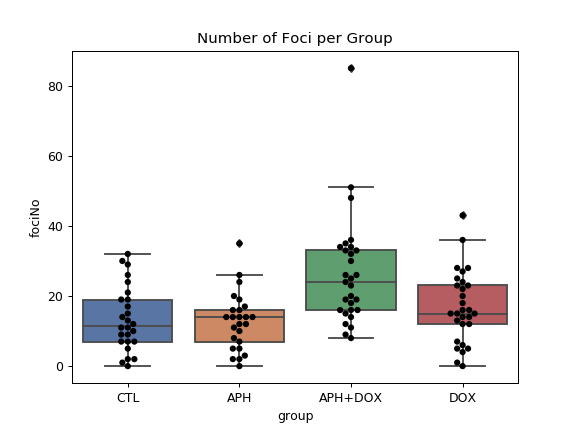

In [56]:
%matplotlib notebook
ax=sns.boxplot(data=data,x='group',y='fociNo', palette="deep")
ax.set(xlabel="Groups", ylabel="Number of Foci")
ax.set_title("Number of Foci per Group")
sns.swarmplot(data=data,x='group',y='fociNo', color='black')

<IPython.core.display.Javascript object>


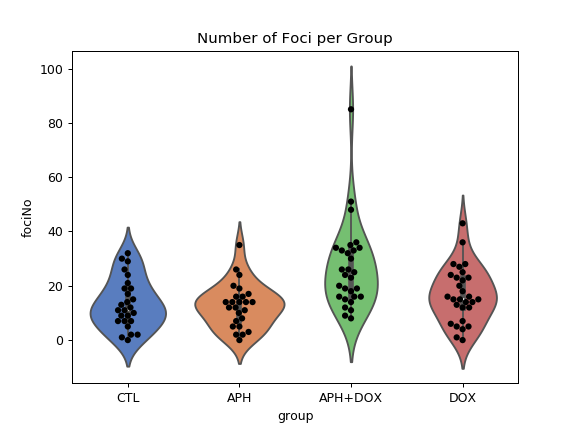

In [57]:
%matplotlib notebook
ax=sns.violinplot(data=data,x='group',y='fociNo', palette="muted")
ax.set(xlabel="Groups", ylabel="Number of Foci")
ax.set_title("Number of Foci per Group")
sns.swarmplot(data=data,x='group',y='fociNo', color='black')